In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import random

### Introduction to the data

In [64]:
msft = pd.read_csv("data/MSFT.csv", parse_dates=['Date'])
gs = pd.read_csv("data/GS.csv", parse_dates=['Date'])
tsla = pd.read_csv("data/TSLA.csv", parse_dates=['Date'])
v = pd.read_csv("data/V.csv", parse_dates=['Date'])
aapl = pd.read_csv("data/AAPL.csv", parse_dates=['Date'])

In [65]:
msft.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
263,2013-01-22,27.299999,27.450001,27.000000,27.150000,22.638245,58650600
2228,2020-11-09,224.440002,228.119995,217.880005,218.389999,216.404266,44395000
1371,2017-06-15,69.269997,70.209999,68.800003,69.900002,65.880608,26068700
1978,2019-11-12,146.279999,147.570007,146.059998,147.070007,144.092346,18641600
2337,2021-04-19,260.190002,261.480011,257.820007,258.739990,257.650665,23209300


In [66]:
msft.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2.482000e+03
mean,94.626551,95.494815,93.741620,94.678880,90.737950,3.400731e+07
std,73.521419,74.215372,72.832065,73.589541,74.979446,1.802483e+07
min,26.379999,26.629999,26.260000,26.370001,21.707487,7.425600e+06
25%,41.167502,41.595000,40.837502,41.240000,36.221183,2.285898e+07
50%,60.994999,61.395000,60.805000,61.105000,56.918037,2.965320e+07
75%,127.842502,129.417496,127.082500,128.129997,124.999542,3.969452e+07
max,338.510010,338.790009,334.529999,336.989990,336.989990,2.484285e+08


In [67]:
msft.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [68]:
# first date
print("The first date in our dataframe is", msft.Date.min())
assert msft.Date.min() == gs.Date.min()

The first date in our dataframe is 2012-01-03 00:00:00


In [69]:
# add new column for the relative price to the first day in our df
msft["Rel_price"] = msft.Close / msft[msft.Date==datetime.datetime(2012,1,3)].Close.to_numpy()
v["Rel_price"] = v.Close / v[v.Date==datetime.datetime(2012,1,3)].Close.to_numpy()
aapl["Rel_price"] = aapl.Close / aapl[aapl.Date==datetime.datetime(2012,1,3)].Close.to_numpy()
tsla["Rel_price"] = tsla.Close / tsla[tsla.Date==datetime.datetime(2012,1,3)].Close.to_numpy()
gs["Rel_price"] = gs.Close / gs[gs.Date==datetime.datetime(2012,1,3)].Close.to_numpy()

In [70]:
msft["Company"] = "MICROSOFT"
v["Company"] = "VISA"
aapl["Company"] = "APPLE"
tsla["Company"] = "TESLA"
gs["Company"] = "GOLDMAN SACHS"

In [71]:
data_frames = [msft, v, aapl, tsla, gs]
stock_df = pd.DataFrame()

for df in data_frames:
    stock_df = pd.concat([stock_df, df])

In [72]:
# make dictionary with colors so that the graphs aren't confused later on
colors_dict = {"MICROSOFT":"tab:purple" , "VISA":"tab:orange", "APPLE":"black", "TESLA":"tab:red", "GOLDMAN SACHS":"tab:blue"}

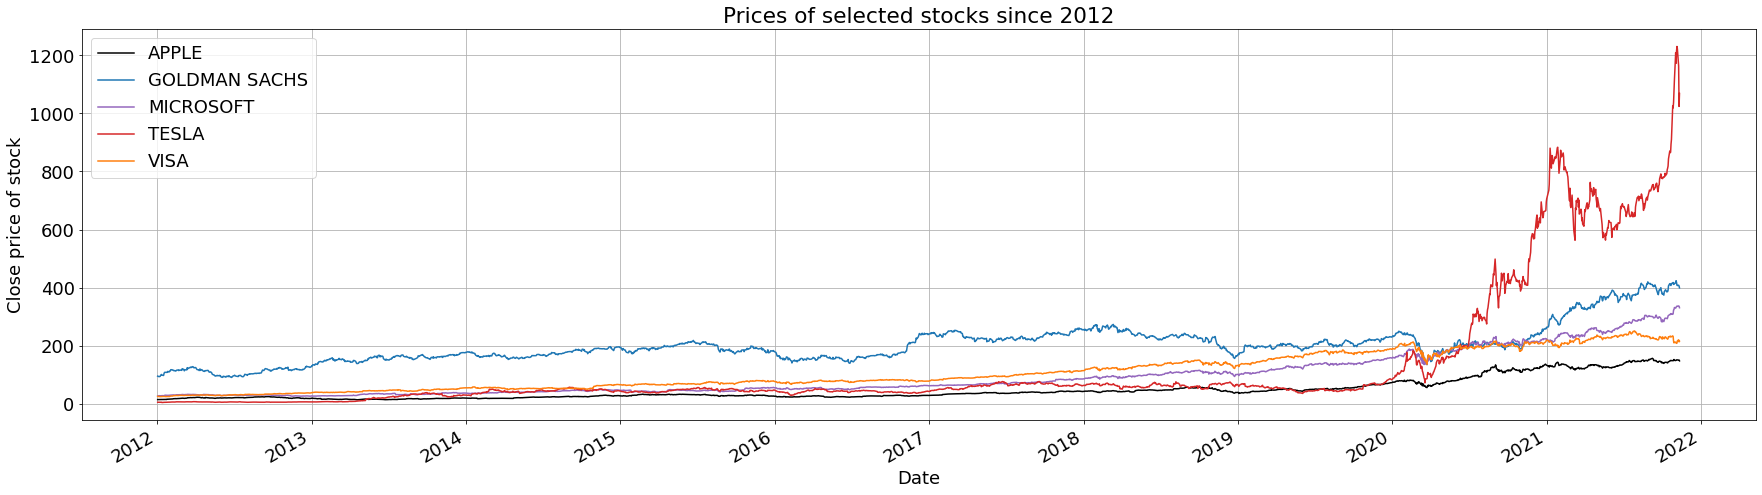

In [73]:
fig, ax = plt.subplots(figsize=(30,8))

for key, grp in stock_df.groupby(['Company']):
    ax = grp.plot(ax=ax, kind='line', x='Date', y='Close', label=key, grid=True, c=colors_dict[key])

plt.legend(loc='best')
plt.title("Prices of selected stocks since 2012")
plt.ylabel("Close price of stock")
plt.show()

The close value doesn't tell us which stock did best throughout the whole period. For this, we need to check the relative price to the price of the first day in the period.

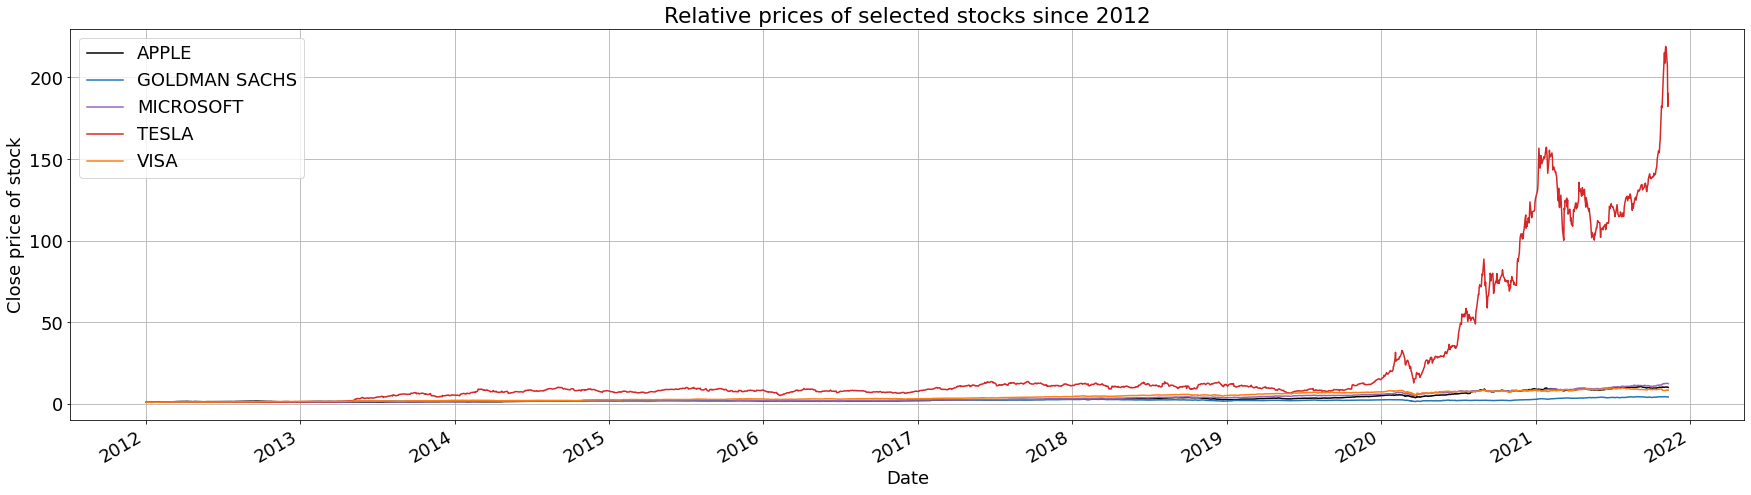

In [74]:
fig, ax = plt.subplots(figsize=(30,8))

for key, grp in stock_df.groupby(['Company']):
    ax = grp.plot(ax=ax, kind='line', x='Date', y='Rel_price', label=key, grid=True, c=colors_dict[key])

plt.legend(loc='best')
plt.title("Relative prices of selected stocks since 2012")
plt.ylabel("Close price of stock")
plt.show()

This clearly presents tesla as the best choice investment when investing for the whole span. However, we are interested also in some short period gains.

Let's see how the graph looks with using logarithm on y (Rel_price).

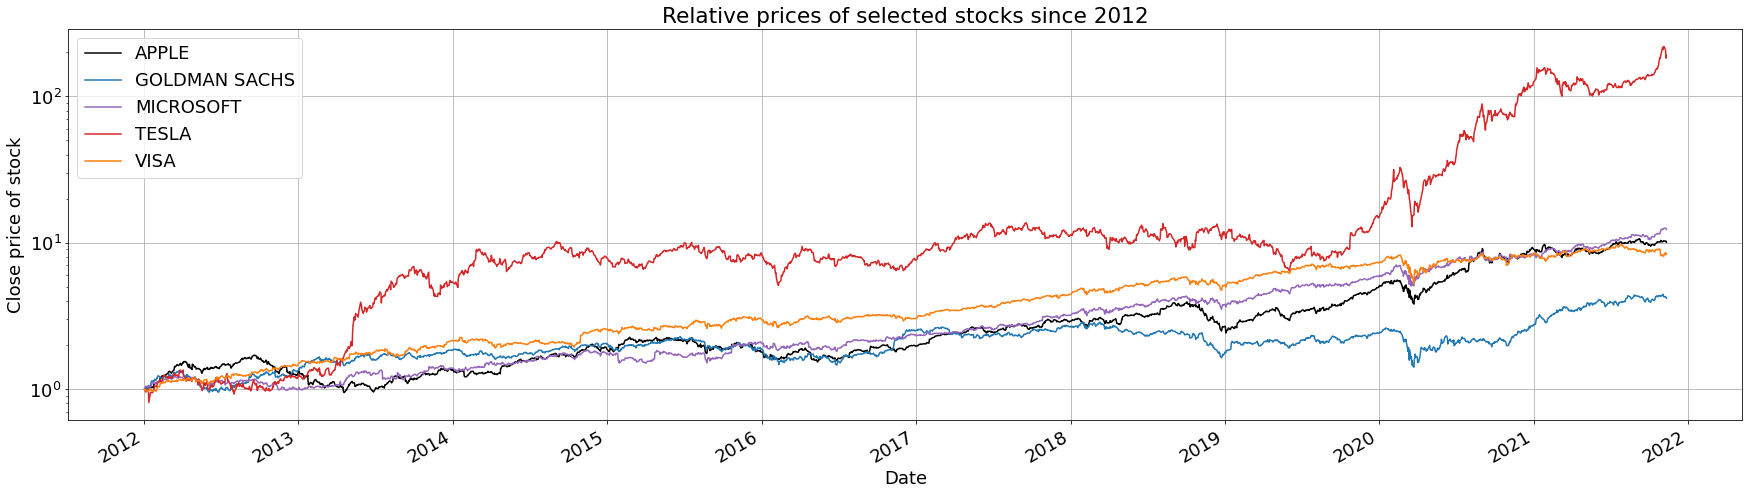

In [75]:
fig, ax = plt.subplots(figsize=(30,8))

for key, grp in stock_df.groupby(['Company']):
    ax = grp.plot(ax=ax, kind='line', x='Date', y='Rel_price', label=key, grid=True, c=colors_dict[key], logy=True)

plt.legend(loc='best')
plt.title("Relative prices of selected stocks since 2012")
plt.ylabel("Close price of stock")
plt.show()

Aditionally, let's check out the relative prices without TSLA.

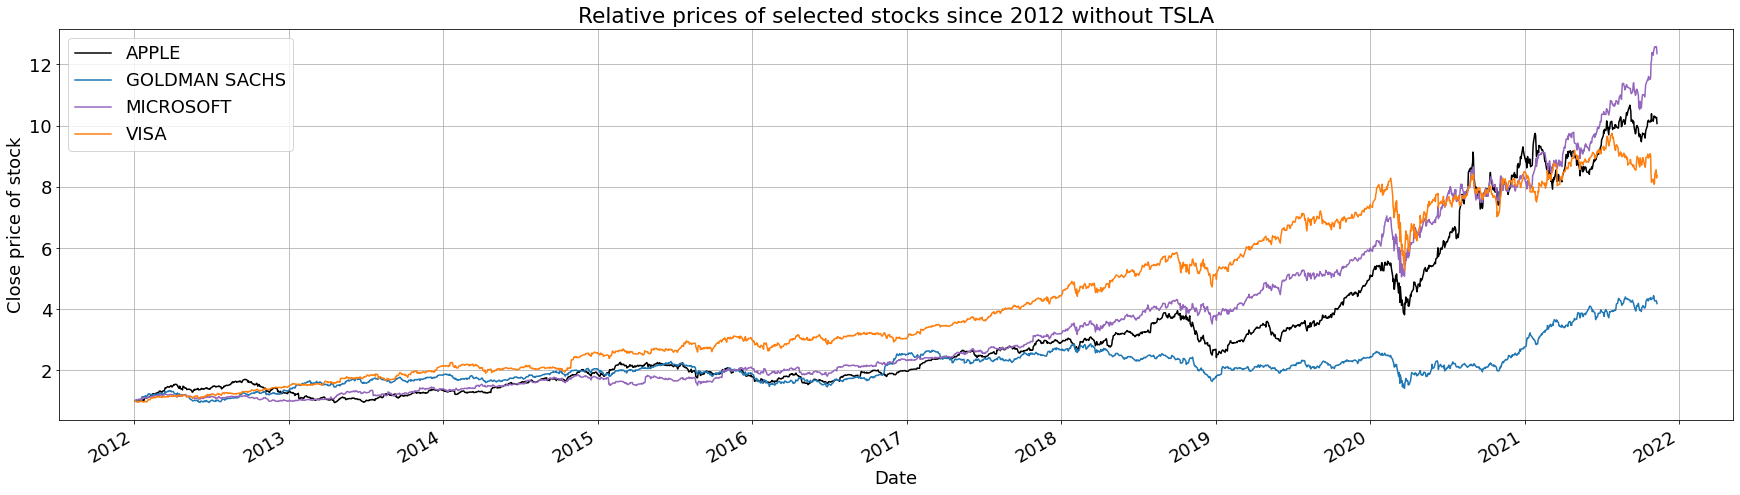

In [76]:
fig, ax = plt.subplots(figsize=(30,8))

for key, grp in stock_df.groupby(['Company']):
    if key != "TESLA":
        ax = grp.plot(ax=ax, kind='line', x='Date', y='Rel_price', label=key, grid=True, c=colors_dict[key])

plt.legend(loc='best')
plt.title("Relative prices of selected stocks since 2012 without TSLA")
plt.ylabel("Close price of stock")
plt.show()

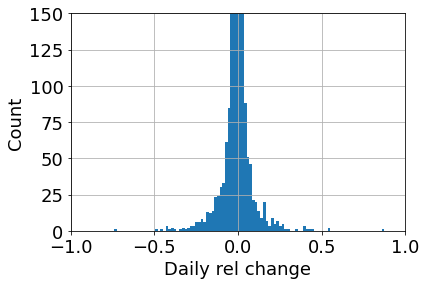

In [77]:
difference_msft = stock_df[stock_df.Company=="MICROSOFT"].Rel_price.diff()[1:] * (-1)
difference_msft.hist(bins=100)
plt.xlim([-1, 1])
plt.ylim([0, 150])
plt.xlabel("Daily rel change")
plt.ylabel("Count")
plt.show()

In [78]:
stock_df["Rel_gain"] = stock_df["Rel_price"] - 1

### Prepare monthly data for GA

In [79]:
msft = pd.read_csv("data/monthly/MSFT_monthly.csv", parse_dates=['Date'])
gs = pd.read_csv("data/monthly/GS_monthly.csv", parse_dates=['Date'])
tsla = pd.read_csv("data/monthly/TSLA_monthly.csv", parse_dates=['Date'])
v = pd.read_csv("data/monthly/V_monthly.csv", parse_dates=['Date'])
aapl = pd.read_csv("data/monthly/AAPL_monthly.csv", parse_dates=['Date'])

In [80]:
msft["Company"] = "MICROSOFT"
v["Company"] = "VISA"
aapl["Company"] = "APPLE"
tsla["Company"] = "TESLA"
gs["Company"] = "GOLDMAN SACHS"

In [81]:
# add new column for the relative price to the first day in our df
msft["Rel_price"] = msft.Close / msft[msft.Date==datetime.datetime(2012,1,1)].Close.to_numpy()
v["Rel_price"] = v.Close / v[v.Date==datetime.datetime(2012,1,1)].Close.to_numpy()
aapl["Rel_price"] = aapl.Close / aapl[aapl.Date==datetime.datetime(2012,1,1)].Close.to_numpy()
tsla["Rel_price"] = tsla.Close / tsla[tsla.Date==datetime.datetime(2012,1,1)].Close.to_numpy()
gs["Rel_price"] = gs.Close / gs[gs.Date==datetime.datetime(2012,1,1)].Close.to_numpy()

In [82]:
data_frames = [msft, v, aapl, tsla, gs]
stock_df = pd.DataFrame()

for df in data_frames:
    stock_df = pd.concat([stock_df, df])

In [83]:
# stopa procentowa NBP 1% per year divided by the number of months
RISK_FREE_RATE = 0.01 / 12

# ostatni dzień, do którego liczymy zwroty
LAST_DAY = datetime.datetime(2015,11,1)

In [84]:
stock_pivot_df = stock_df.pivot(index="Date", columns="Company", values="Rel_price")
stock_pivot_df = stock_pivot_df - 1
stock_pivot_df

Company,APPLE,GOLDMAN SACHS,MICROSOFT,TESLA,VISA
Date,,,,,
2012-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
2012-02-01,0.188311,0.032924,0.074839,0.149295,0.156300
2012-03-01,0.313420,0.115726,0.092448,0.281046,0.172496
2012-04-01,0.279311,0.033013,0.084321,0.139663,0.221979
2012-05-01,0.265620,-0.141473,-0.011514,0.014792,0.144674
...,...,...,...,...,...
2021-08-01,8.313092,2.709608,9.222824,125.542823,8.105724
2021-09-01,7.679461,2.391316,8.546902,132.381490,7.853339
2021-10-01,8.188574,2.708173,10.229935,190.606467,7.416932


In [85]:
monthly_hist_returns = stock_pivot_df.copy()
monthly_hist_returns = monthly_hist_returns[monthly_hist_returns.index <= LAST_DAY]
monthly_hist_returns = monthly_hist_returns.iloc[1:, :]
monthly_hist_returns

Company,APPLE,GOLDMAN SACHS,MICROSOFT,TESLA,VISA
Date,,,,,
2012-02-01,0.188311,0.032924,0.074839,0.149295,0.156300
2012-03-01,0.313420,0.115726,0.092448,0.281046,0.172496
2012-04-01,0.279311,0.033013,0.084321,0.139663,0.221979
2012-05-01,0.265620,-0.141473,-0.011514,0.014792,0.144674
2012-06-01,0.279355,-0.140038,0.035896,0.076367,0.228438
2012-07-01,0.337978,-0.094824,-0.002032,-0.056760,0.282492
2012-08-01,0.457326,-0.051583,0.043684,-0.018920,0.274344
2012-09-01,0.461400,0.019826,0.007789,0.007224,0.334261
2012-10-01,0.304154,0.097964,-0.033525,-0.032336,0.378776


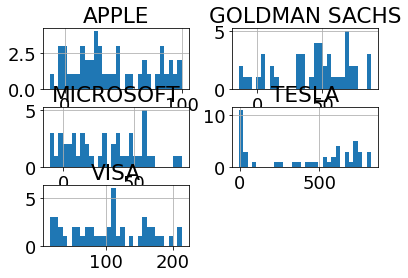

In [86]:
# in percents
(monthly_hist_returns*100).hist(bins=30)
plt.show()

In [87]:
monthly_hist_returns.describe()

Company,APPLE,GOLDMAN SACHS,MICROSOFT,TESLA,VISA
count,46.000000,46.000000,46.000000,46.000000,46.000000
mean,0.402521,0.426715,0.285325,4.179080,1.026152
std,0.329953,0.280235,0.255256,3.115034,0.573006
min,-0.131331,-0.141473,-0.098544,-0.056760,0.144674
25%,0.156069,0.312820,0.075686,0.283368,0.570871
50%,0.308787,0.470710,0.286319,5.367045,1.057681
75%,0.692341,0.673253,0.492550,6.884675,1.557333
max,0.997809,0.873060,0.840501,8.277606,2.140302


In [88]:
monthly_return_mean = monthly_hist_returns.mean()
monthly_return_mean

Company
APPLE            0.402521
GOLDMAN SACHS    0.426715
MICROSOFT        0.285325
TESLA            4.179080
VISA             1.026152
dtype: float64

In [89]:
monthly_return_std = monthly_hist_returns.std()
monthly_return_std

Company
APPLE            0.329953
GOLDMAN SACHS    0.280235
MICROSOFT        0.255256
TESLA            3.115034
VISA             0.573006
dtype: float64

In [90]:
monthly_return_cov = monthly_hist_returns.cov()
monthly_return_cov

Company,APPLE,GOLDMAN SACHS,MICROSOFT,TESLA,VISA
Company,,,,,
APPLE,0.108869,0.053852,0.063813,0.625555,0.135819
GOLDMAN SACHS,0.053852,0.078532,0.060136,0.771619,0.147627
MICROSOFT,0.063813,0.060136,0.065156,0.704710,0.131393
TESLA,0.625555,0.771619,0.704710,9.703440,1.557346
VISA,0.135819,0.147627,0.131393,1.557346,0.328336


In [91]:
monthly_return_mean = monthly_return_mean.to_numpy()
monthly_return_std = monthly_return_std.to_numpy()
monthly_return_cov = monthly_return_cov.to_numpy()

### Genetic algorithm

##### Objective (fitness) function

The fitness function that we would like to use is Sharpe Ratio (https://www.investopedia.com/articles/07/sharpe_ratio.asp). The ratio describes how much excess return you receive for the extra volatility you endure for holding a riskier asset. The volatility of the asset defines its risk so this metric satisfies our requirement to balance between risk and expected return.

So what is considered a good Sharpe ratio that indicates a high degree of expected return for a relatively low amount of risk?

Usually, any Sharpe ratio greater than 1.0 is considered acceptable to good by investors.
A ratio higher than 2.0 is rated as very good.
A ratio of 3.0 or higher is considered excellent.
A ratio under 1.0 is considered sub-optimal.

##### Chromosome (individual)

In [92]:
class Individual():
    def __init__(self, weights=None, N=5):
        """Makes a new individual. If we don't provide weights 
        then we create an individual with random weights"""
        if weights is None:
            self.weights = self.create_random_individual(N)
        else:
            self.weights = weights.copy()

    def create_random_individual(self, N):
        """Creates a random weight distribution 
        for N companies
        """
        random_numbers = np.random.random(N)
        random_weights = random_numbers/random_numbers.sum()
        return random_weights
        
    def get_weights(self):
        return self.weights

    def set_weights(self, new_weights):
        self.weights = new_weights.copy()

    def get_gene(self, index):
        return self.weights[index]

    def set_gene(self, index, new_gene):
        self.weights[index] = new_gene

    def get_length(self):
        # total number in portfolio
        return len(self.weights)

    def get_fitness(self):
        """Calculates fitness (sharpe ratio) of the weights"""
        return self._sharpe_ratio()
    
    def _sharpe_ratio(self):
        portfolio_return = self.get_return()
        std_return = np.sqrt(self.get_risk())

        return (portfolio_return - RISK_FREE_RATE) / std_return

    def get_risk(self):
        variance = np.square(monthly_return_std * self.weights).sum()
        for i in range(len(self.weights)):
            for j in range(i+1, len(self.weights)):
                variance += 2 * self.weights[i] * self.weights[j] * monthly_return_cov[i][j]
        
        return variance

    def get_return(self):
        return (monthly_return_mean * self.weights).sum()

### Population

In [93]:
class Population():
    def __init__(self, population_size=0, initialise=True):
        """Given population size creates new population with empty
        Individuals"""
        self.individuals = []
        if initialise:
            self.individuals = [Individual() for _ in range(population_size)]

    def get_individual(self, index):
        return self.individuals[index]

    def find_fittest(self):
        """Finds and returns the fittest individual of the whole population"""
        individuals_fitness = [ind.get_fitness() for ind in self.individuals]
        max_fitness = max(individuals_fitness)
        max_index = individuals_fitness.index(max_fitness)
        best_weights = self.individuals[max_index].get_weights()

        return Individual(weights=best_weights)

    def find_worst(self):
        """Finds and returns the worst individual of the whole population"""
        individuals_fitness = [ind.get_fitness() for ind in self.individuals]
        min_fitness = min(individuals_fitness)
        min_index = individuals_fitness.index(min_fitness)
        return self.individuals[min_index]

    def append_individual(self, individual):
        """Appends individual to the population"""
        self.individuals.append(individual)

    def remove_individual(self, individual):
        """Removes individual to the population"""
        self.individuals.remove(individual)

    def get_size(self):
        return len(self.individuals)

### Portfolio Optimization

In [128]:
class portfolioOptimization():
    # Constants
    crossover_probability = 0.8
    mutation_probability = 0.01
    elitism = True
    tournament_size = 2


    @staticmethod
    def evolve(population):
        """
        main genetic algorithm function (one iteration)
        Implements elitism, crossover and mutation
        """
        elitism_size = 1

        evolved_population = Population(initialise=False)
        start = 0

        if portfolioOptimization.elitism:
            evolved_population.append_individual(population.find_fittest())
            start += elitism_size
        
        for i in range((population.get_size() + 1) // 2):
            individual1 = portfolioOptimization.tournament_selection(population)
            individual2 = portfolioOptimization.tournament_selection(population)

            new_individual1, new_individual2 = portfolioOptimization.crossover(individual1, individual2)
            evolved_population.append_individual(new_individual1)
            evolved_population.append_individual(new_individual2)

        for i in range(start, evolved_population.get_size()):
            current_individual = evolved_population.get_individual(i)
            portfolioOptimization.mutation(current_individual)

        evolved_population.remove_individual(evolved_population.find_worst())

        return evolved_population

    @staticmethod
    def crossover(individual1, individual2):
        """
        Arithmetic crossover
        Based on two individuals returns two children
        """
        if random.random() <= portfolioOptimization.crossover_probability:
            first_parent_weights = individual1.get_weights()
            second_parent_weights = individual2.get_weights()
        else:
            return Individual(weights=individual1.get_weights()), Individual(weights=individual2.get_weights())
        
        # alpha is a random number between 0 and 1
        alpha = random.uniform(0, 0.1)

        child1_weights = alpha * first_parent_weights + (1-alpha) * second_parent_weights
        child2_weights = (1-alpha) * first_parent_weights + alpha * second_parent_weights

        child1 = Individual(weights=child1_weights)
        child2 = Individual(weights=child2_weights)

        return child1, child2

    @staticmethod
    def mutation(individual):
        """
        Mutates selected individual if random number is higher than mutation probability
        Mutation chooses 2 indices between 0 and 5 and switch weights between these two
        """
        # new_ind = Individual(individual.get_weights())
        if random.random() <= portfolioOptimization.mutation_probability:
            first_index, second_index = random.sample(range(5), 2)
            first_gene = individual.get_gene(first_index)
            second_gene = individual.get_gene(second_index)
            individual.set_gene(first_index, second_gene)
            individual.set_gene(second_index, first_gene)

    @staticmethod
    def tournament_selection(population):
        """
        Tournament selection to find individuals for crossover
        Returns the best of the randomly sampled individuals (size = tournament_size )
        """
        indices = random.sample(range(population.get_size()), portfolioOptimization.tournament_size)
        samples = [population.get_individual(index) for index in indices]
        selected = sorted(samples, key=lambda ind: ind.get_fitness(), reverse=True)[0]  
        return selected

## Run the algorithm

In [126]:
NUM_ITER = 1000
population = Population(population_size=50)

iterations = list(range(0, NUM_ITER))
fitness_plot = []

for i in range(NUM_ITER):
    population = portfolioOptimization.evolve(population)

    # create plots
    fittest = population.find_fittest() 
    fitness_plot.append(fittest.get_fitness())

fittest = population.find_fittest()     
print("Risk {:.4f}, return {:.4f}, Sharpe ratio {:.4f}, worst sr {:.4f}".format(fittest.get_risk(), fittest.get_return(), fittest.get_fitness(), population.find_worst().get_fitness()))
print(fittest.get_weights())

Risk 0.1649, return 0.6734, Sharpe ratio 1.6562, worst sr 1.6365
[0.22181816 0.23358502 0.1616659  0.0143754  0.36855552]


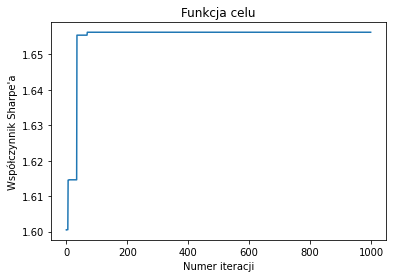

In [127]:
plt.rcParams.update({'font.size': 10})
plt.plot(iterations, fitness_plot)
plt.title('Funkcja celu')
plt.xlabel('Numer iteracji')
plt.ylabel('Współczynnik Sharpe\'a')
plt.savefig('1000iteracji.png')
plt.show()

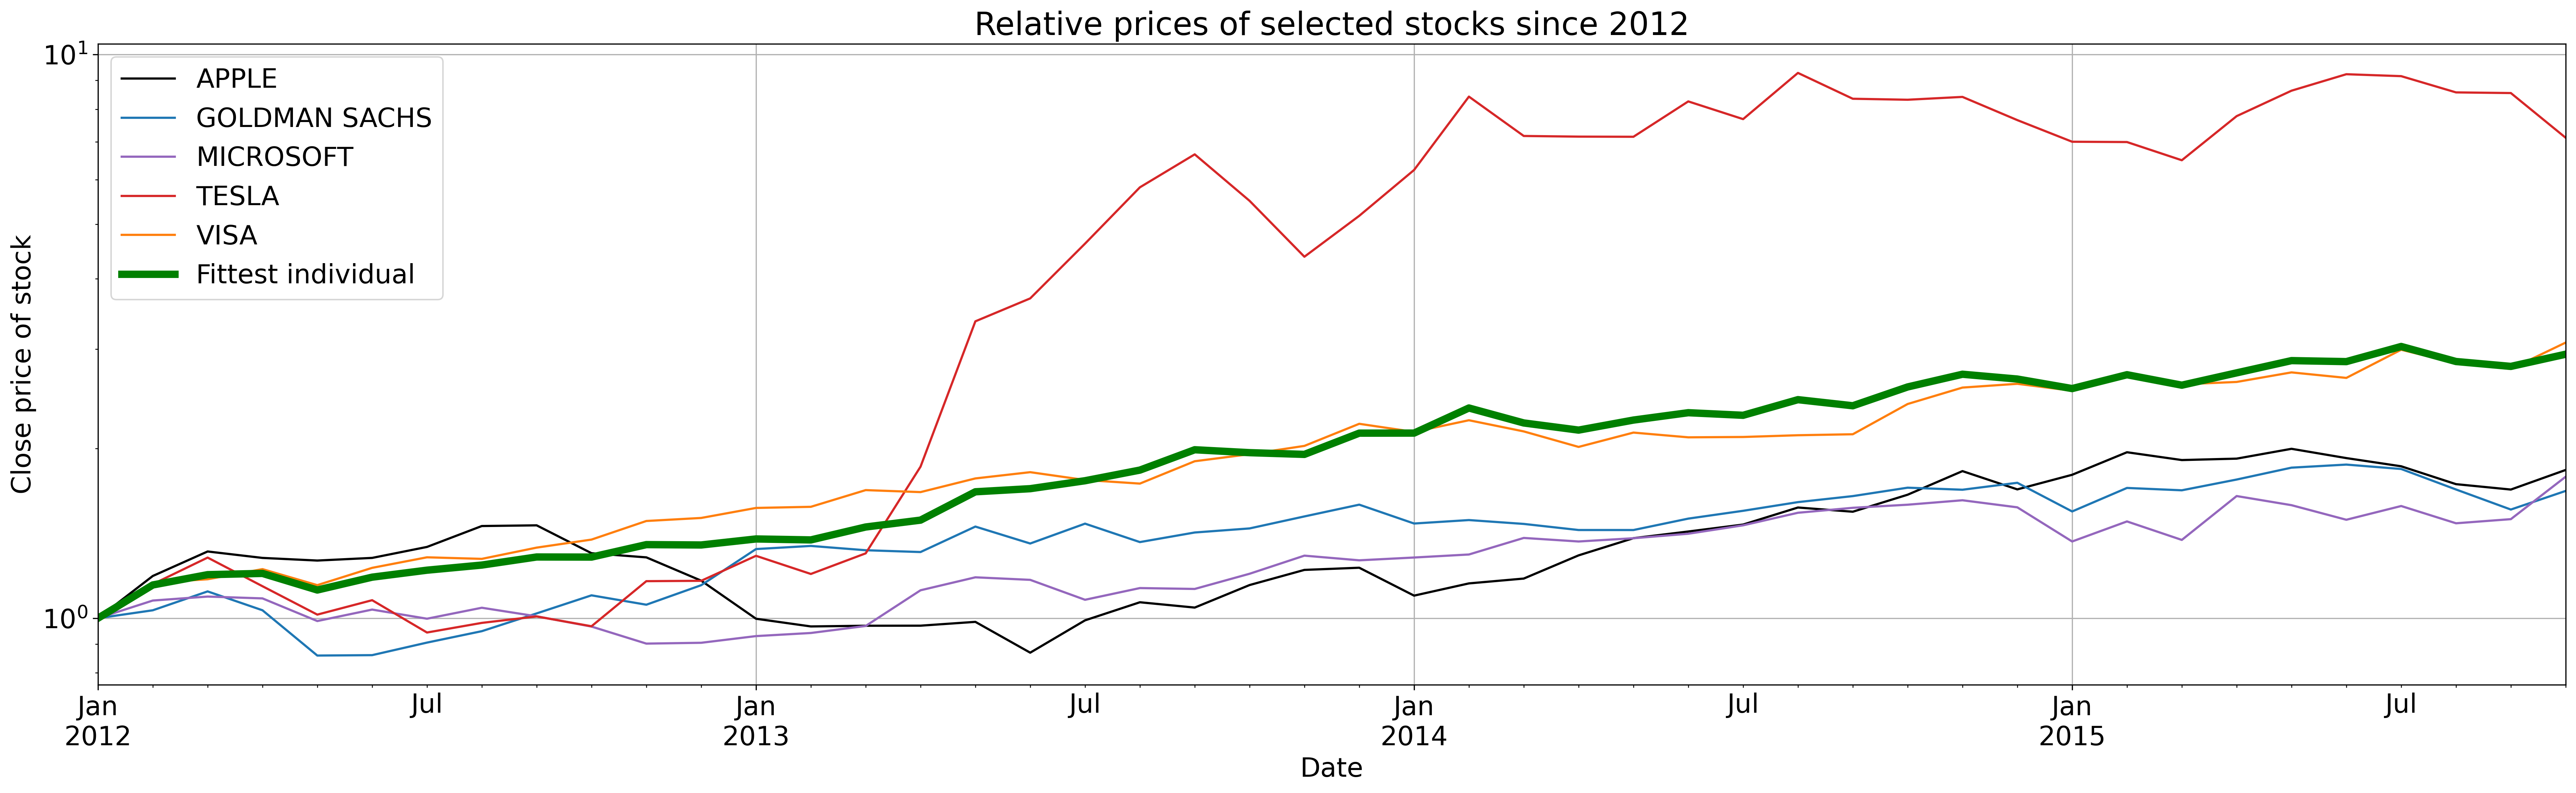

In [39]:
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(figsize=(30,8), dpi=300)
stock_plot = stock_df[stock_df.Date < LAST_DAY]

stock_pivot_df = stock_plot.pivot(index="Date", columns="Company", values="Rel_price")
stock_pivot_df["Fittest individual"] = (fittest.get_weights() * stock_pivot_df).sum(axis=1)
stock_pivot_df = stock_pivot_df.reset_index()

for key, grp in stock_plot.groupby(['Company']):
    # print(grp)
    ax = grp.plot(ax=ax, kind='line', x='Date', y='Rel_price', label=key, grid=True, c=colors_dict[key], logy=True)

ax = stock_pivot_df.plot(ax=ax, kind='line', x='Date', y='Fittest individual', label="Fittest individual", grid=True, c="green", logy=True, lw=5)

plt.legend(loc='best')
plt.title("Relative prices of selected stocks since 2012")
plt.ylabel("Close price of stock")
plt.savefig("Fittest_vs_others.png")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b1d066be-3dcf-44d9-8f22-8aa1217a4a17' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>